<h3>QUESTION 1 - Radon Transform</h3>

The radon_transform() function takes in the parameters of theta (angle) and r(number of projections) and computes the sinogram of the image. <br>

We make use of the cv.getRotationMatrix2D and cv.warpAffine functions to rotate the image and then add up all of the projections.

In [61]:
import numpy as np
import cv2 as cv
import skimage
import matplotlib.pyplot as plt

def radon_transform(image, theta, r):
    height, width = image.shape
    diagonal = int(np.ceil(np.sqrt(height**2 + width**2)))
    R = np.zeros((diagonal, r), dtype='float64')
    
    for s in range(r):
        angle = -s * theta / r
        rotation_matrix = cv.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1.0)

        # make the output same size as input image
        rotation = cv.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]), borderMode=cv.BORDER_CONSTANT, borderValue=0)
        projection = np.sum(rotation,axis=0)
        rotation = rotation.astype('float64')
        R[:, s] = np.pad(projection, (0, diagonal - len(projection)), mode='constant', constant_values=0)
    
    return R

Text(0.5, 1.0, 'Sinogram')

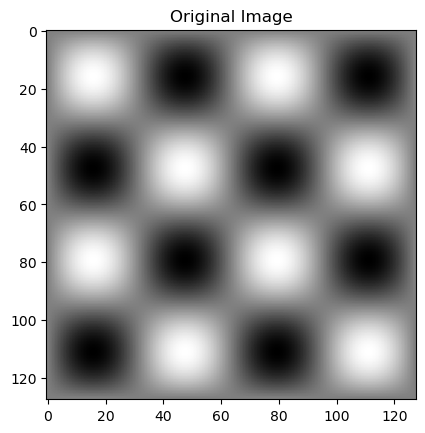

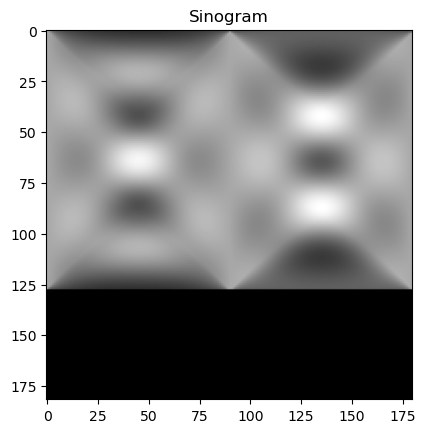

In [62]:
x, y = np.meshgrid(np.linspace(-2*np.pi, 2*np.pi, 128), np.linspace(-2*np.pi, 2*np.pi, 128))
I = 0.5 * (1 + (np.sin(x) * np.sin(y)))
plt.figure()
plt.imshow(I,cmap = "gray")
plt.title("Original Image")

output = radon_transform(I, 180, 180)
plt.figure()
plt.imshow(output,cmap = "gray")
plt.title("Sinogram")

Text(0.5, 1.0, 'Sinogram')

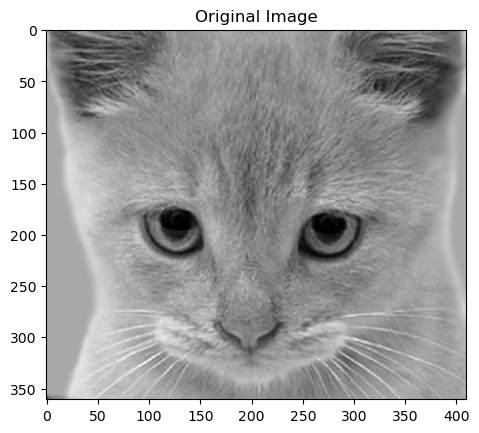

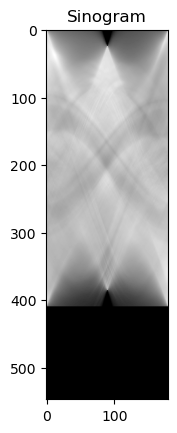

In [63]:
img = cv.imread("cat.bmp")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(img,cmap = "gray")
plt.title("Original Image")

output = radon_transform(img,180,180)
plt.figure()
plt.imshow(output,cmap = "gray")
plt.title("Sinogram")